In [43]:
# Import necessary libraries
import pandas as pd

# Load the sierraleone dataset
file_path_sierraleone = '../data/sierraleone-bumbuna.csv'  
data_sierraleone = pd.read_csv(file_path_sierraleone)

# Display the first few rows
print("First few rows of the Sierraleone dataset:")
print(data_sierraleone.head())

# Display dataset information
print("\nDataset Information:")
print(data_sierraleone.info())

# Calculate summary statistics
print("\nSummary Statistics for Sierraleone Dataset:")
summary_stats = data_sierraleone.describe().T  
print(summary_stats)


First few rows of the Sierraleone dataset:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN

In [44]:
print(data_sierraleone.dtypes)


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [45]:
# Convert Timestamp to datetime format
data_sierraleone['Timestamp'] = pd.to_datetime(data_sierraleone['Timestamp'], errors='coerce')

# Verify the conversion
print(data_sierraleone['Timestamp'].head())


0   2021-10-30 00:01:00
1   2021-10-30 00:02:00
2   2021-10-30 00:03:00
3   2021-10-30 00:04:00
4   2021-10-30 00:05:00
Name: Timestamp, dtype: datetime64[ns]


In [46]:
# Convert Timestamp to datetime format
data_sierraleone['Timestamp'] = pd.to_datetime(data_sierraleone['Timestamp'], errors='coerce')

# Verify the conversion
print(data_sierraleone['Timestamp'].head())


0   2021-10-30 00:01:00
1   2021-10-30 00:02:00
2   2021-10-30 00:03:00
3   2021-10-30 00:04:00
4   2021-10-30 00:05:00
Name: Timestamp, dtype: datetime64[ns]


In [47]:
# Inspect unique values in Comments
print(data_sierraleone['Comments'].unique())


[nan]


In [48]:
data_sierraleone = data_sierraleone.drop(columns=['Comments'])


In [49]:
# Recalculate summary statistics
pd.set_option('display.max_columns', None)  
summary_stats = data_sierraleone.describe().T 
print(summary_stats)

# Calculate the median explicitly
print("\nMedian for Numerical Columns:")
print(data_sierraleone.median(numeric_only=True))


                  count                           mean                  min  \
Timestamp        525600  2022-04-30 12:00:30.000000768  2021-10-30 00:01:00   
GHI            525600.0                     201.957515                -19.5   
DNI            525600.0                     116.376337                 -7.8   
DHI            525600.0                     113.720571                -17.9   
ModA           525600.0                     206.643095                  0.0   
ModB           525600.0                     198.114691                  0.0   
Tamb           525600.0                      26.319394                 12.3   
RH             525600.0                      79.448857                  9.9   
WS             525600.0                       1.146113                  0.0   
WSgust         525600.0                       1.691606                  0.0   
WSstdev        525600.0                       0.363823                  0.0   
WD             525600.0                     133.0446

In [50]:
# Check for missing values
missing_values = data_sierraleone.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(data_sierraleone)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values per Column:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Percentage of Missing Values:
Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
dtype: float64


In [51]:
# Check for negative values in key columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'RH', 'WS', 'BP']
for col in columns_to_check:
    negative_values = data_sierraleone[data_sierraleone[col] < 0]
    print(f"\nNegative Values in {col}:")
    print(negative_values)



Negative Values in GHI:
                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  \
0      2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0   
1      2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
2      2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
3      2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0   
4      2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0   
...                    ...  ...  ...  ...   ...   ...   ...    ...  ...   
525595 2022-10-29 23:56:00 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0   
525596 2022-10-29 23:57:00 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0   
525597 2022-10-29 23:58:00 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0   
525598 2022-10-29 23:59:00 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0   
525599 2022-10-30 00:00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0   

        WSgust  WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TMod

In [52]:
# Handle Missing or Negative Values
for col in columns_to_check:
    data_sierraleone[col] = data_sierraleone[col].apply(lambda x: x if x >= 0 else None)

In [53]:
# Impute missing values using forward-fill for time series
data_sierraleone.fillna(method='ffill', inplace=True)  # Forward-fill

# Optionally, use mean for imputation
for col in columns_to_check:
    data_sierraleone[col].fillna(data_sierraleone[col].mean(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_11104\1640883865.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_sierraleone.fillna(method='ffill', inplace=True)  # Forward-fill
C:\Users\Admin\AppData\Local\Temp\ipykernel_11104\1640883865.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_sierraleone[col].fillna(data_sierraleone[col].mean(), inplace=True)


In [54]:
# Verify there are no missing or negative values
print("\nMissing Values After Cleaning:")
print(data_sierraleone.isnull().sum())

# Check for negative values again
for col in columns_to_check:
    print(f"\nNegative Values Remaining in {col}: {data_sierraleone[data_sierraleone[col] < 0].shape[0]}")



Missing Values After Cleaning:
Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

Negative Values Remaining in GHI: 0

Negative Values Remaining in DNI: 0

Negative Values Remaining in DHI: 0

Negative Values Remaining in RH: 0

Negative Values Remaining in WS: 0

Negative Values Remaining in BP: 0


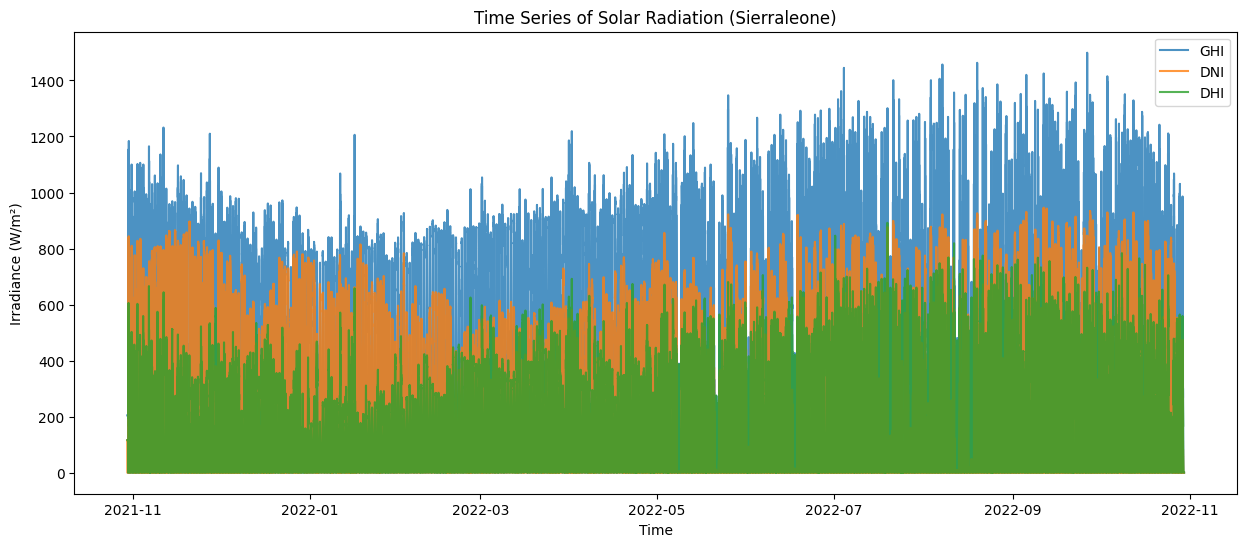

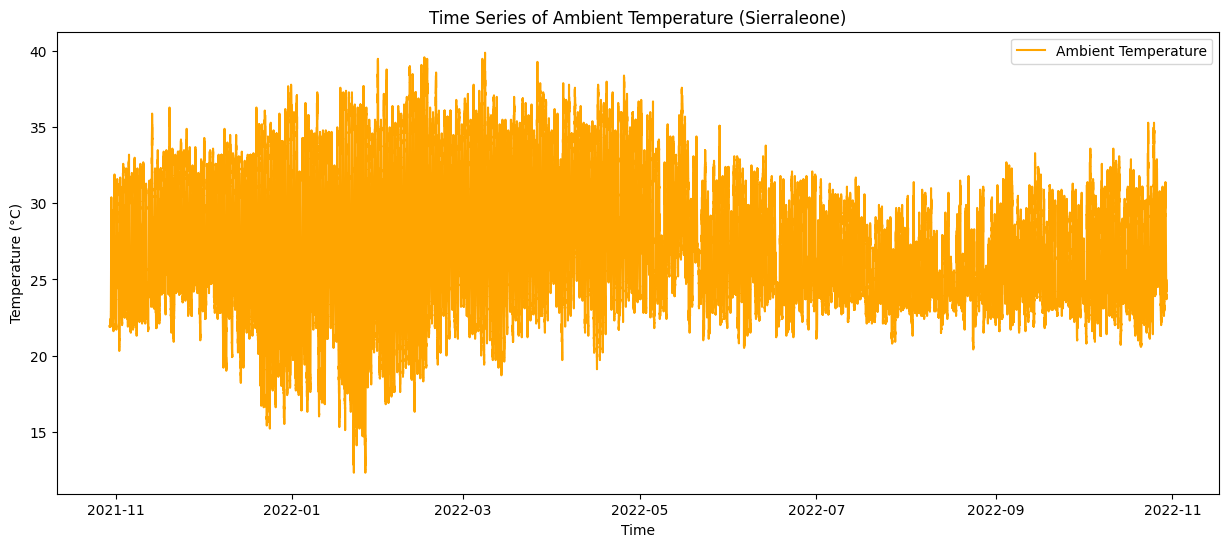

In [55]:
import matplotlib.pyplot as plt

# Ensure Timestamp is in datetime format
data_sierraleone['Timestamp'] = pd.to_datetime(data_sierraleone['Timestamp'])

# Set Timestamp as the index (optional for easier plotting)
data_sierraleone.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI over time
plt.figure(figsize=(15, 6))
plt.plot(data_sierraleone.index, data_sierraleone['GHI'], label='GHI', alpha=0.8)
plt.plot(data_sierraleone.index, data_sierraleone['DNI'], label='DNI', alpha=0.8)
plt.plot(data_sierraleone.index, data_sierraleone['DHI'], label='DHI', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Irradiance (W/m²)')
plt.title('Time Series of Solar Radiation (Sierraleone)')
plt.legend()
plt.show()

# Plot Ambient Temperature (Tamb) over time
plt.figure(figsize=(15, 6))
plt.plot(data_sierraleone.index, data_sierraleone['Tamb'], label='Ambient Temperature', color='orange')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Ambient Temperature (Sierraleone)')
plt.legend()
plt.show()


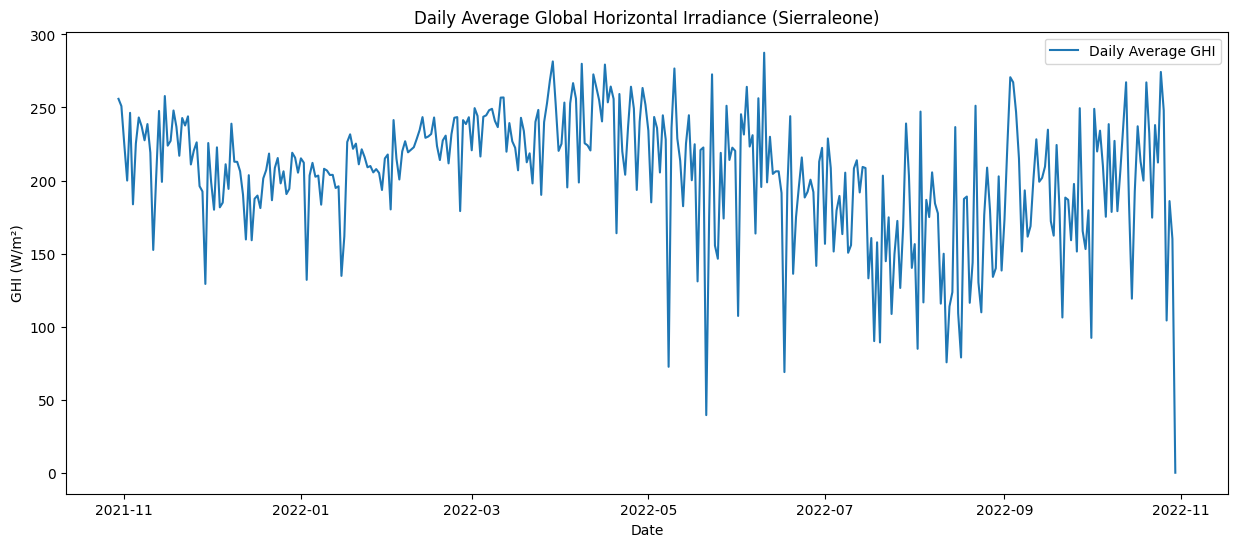

In [17]:
# Resample data to daily averages
daily_data = data_sierraleone.resample('D').mean()

# Plot daily averages for GHI
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index, daily_data['GHI'], label='Daily Average GHI')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.title('Daily Average Global Horizontal Irradiance (Sierraleone)')
plt.legend()
plt.show()


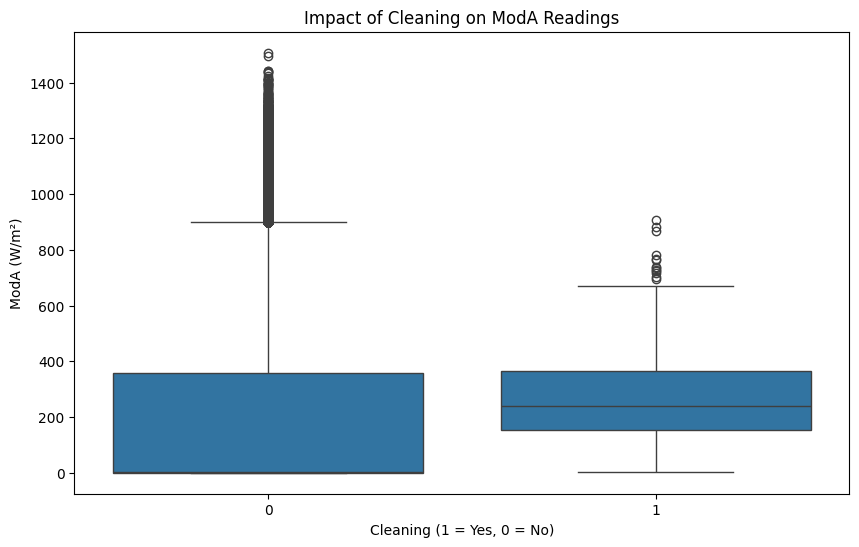

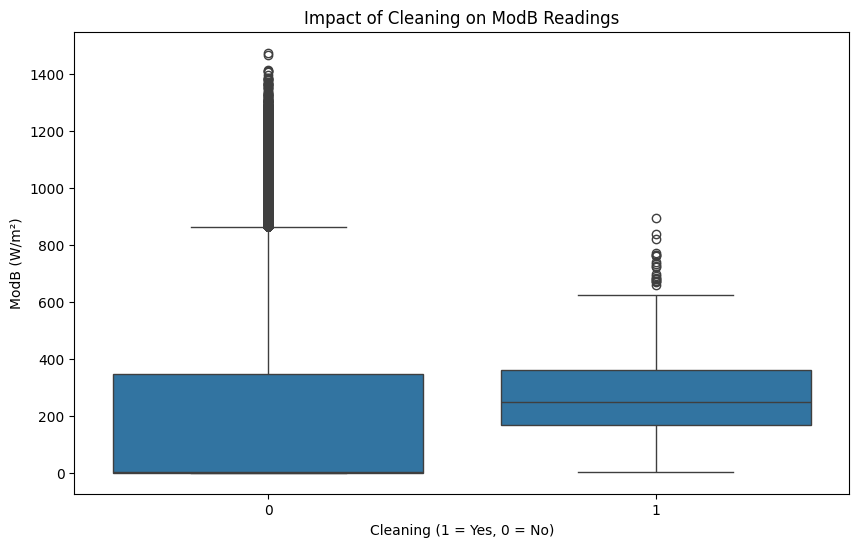

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot ModA readings with and without cleaning
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cleaning', y='ModA', data=data_sierraleone)
plt.title('Impact of Cleaning on ModA Readings')
plt.xlabel('Cleaning (1 = Yes, 0 = No)')
plt.ylabel('ModA (W/m²)')
plt.show()

# Plot ModB readings with and without cleaning
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cleaning', y='ModB', data=data_sierraleone)
plt.title('Impact of Cleaning on ModB Readings')
plt.xlabel('Cleaning (1 = Yes, 0 = No)')
plt.ylabel('ModB (W/m²)')
plt.show()


In [19]:
# Compute average readings for ModA and ModB based on Cleaning
avg_readings = data_sierraleone.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average Sensor Readings with and without Cleaning:")
print(avg_readings)


Average Sensor Readings with and without Cleaning:
                ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


c:\Users\Admin\Desktop\TenX\Week-0\submit\KAIM3-Week-0\.myenvi\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


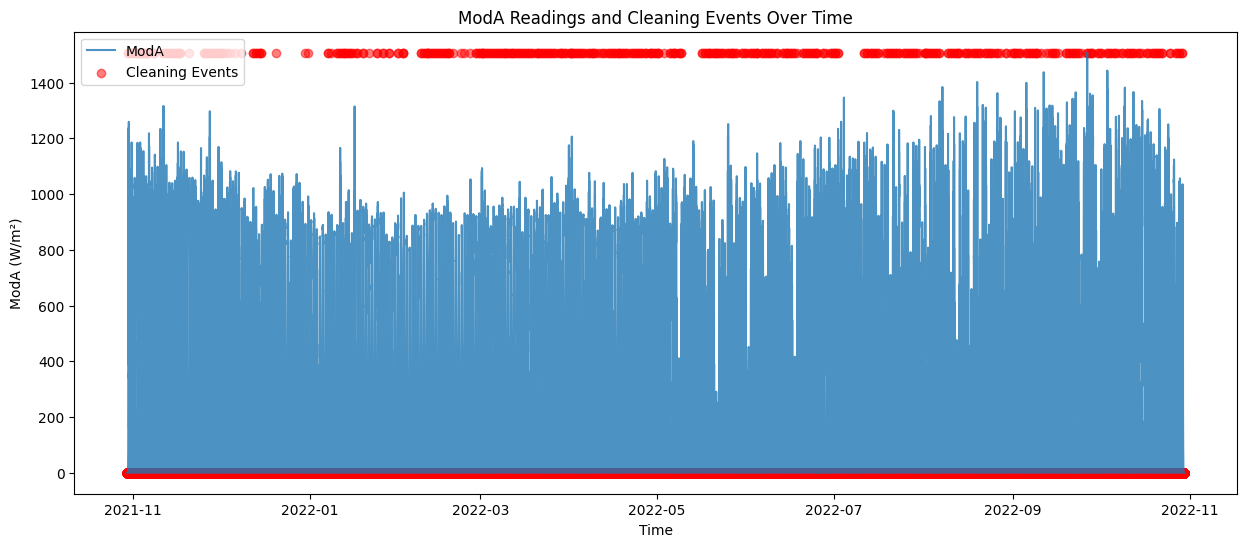

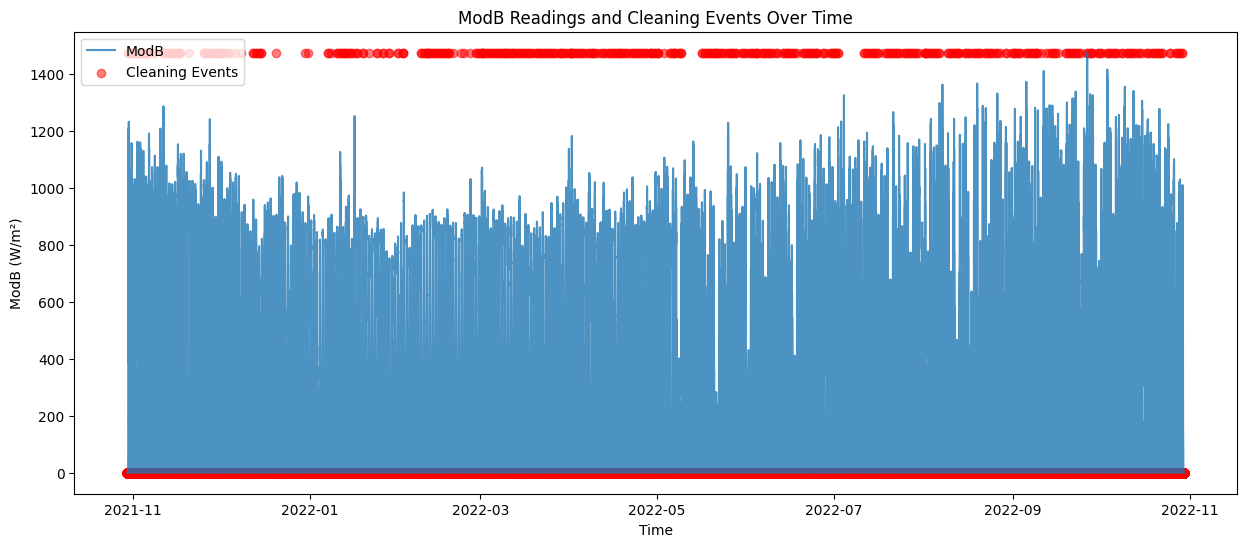

In [20]:
# Plot ModA readings over time with cleaning events
plt.figure(figsize=(15, 6))
plt.plot(data_sierraleone.index, data_sierraleone['ModA'], label='ModA', alpha=0.8)
plt.scatter(data_sierraleone.index, data_sierraleone['Cleaning'] * max(data_sierraleone['ModA']), 
            color='red', label='Cleaning Events', alpha=0.5)
plt.title('ModA Readings and Cleaning Events Over Time')
plt.xlabel('Time')
plt.ylabel('ModA (W/m²)')
plt.legend()
plt.show()

# Plot ModB readings over time with cleaning events
plt.figure(figsize=(15, 6))
plt.plot(data_sierraleone.index, data_sierraleone['ModB'], label='ModB', alpha=0.8)
plt.scatter(data_sierraleone.index, data_sierraleone['Cleaning'] * max(data_sierraleone['ModB']), 
            color='red', label='Cleaning Events', alpha=0.5)
plt.title('ModB Readings and Cleaning Events Over Time')
plt.xlabel('Time')
plt.ylabel('ModB (W/m²)')
plt.legend()
plt.show()


Correlation Matrix:
                    GHI       DNI       DHI      ModA      ModB      Tamb  \
GHI            1.000000  0.869414  0.863680  0.994934  0.994502  0.639443   
DNI            0.869414  1.000000  0.533893  0.876275  0.874767  0.578164   
DHI            0.863680  0.533893  1.000000  0.849248  0.849816  0.565040   
ModA           0.994934  0.876275  0.849248  1.000000  0.999127  0.637249   
ModB           0.994502  0.874767  0.849816  0.999127  1.000000  0.633820   
Tamb           0.639443  0.578164  0.565040  0.637249  0.633820  1.000000   
RH            -0.549110 -0.548814 -0.435180 -0.564704 -0.557814 -0.791937   
WS             0.370453  0.311576  0.345360  0.366454  0.364795  0.539170   
WSgust         0.410470  0.342170  0.383917  0.406698  0.404979  0.557139   
WSstdev        0.411660  0.338787  0.388561  0.409789  0.408429  0.483964   
WD             0.403193  0.315862  0.401746  0.394293  0.394065  0.491221   
WDstdev        0.541261  0.471331  0.479058  0.544326  0

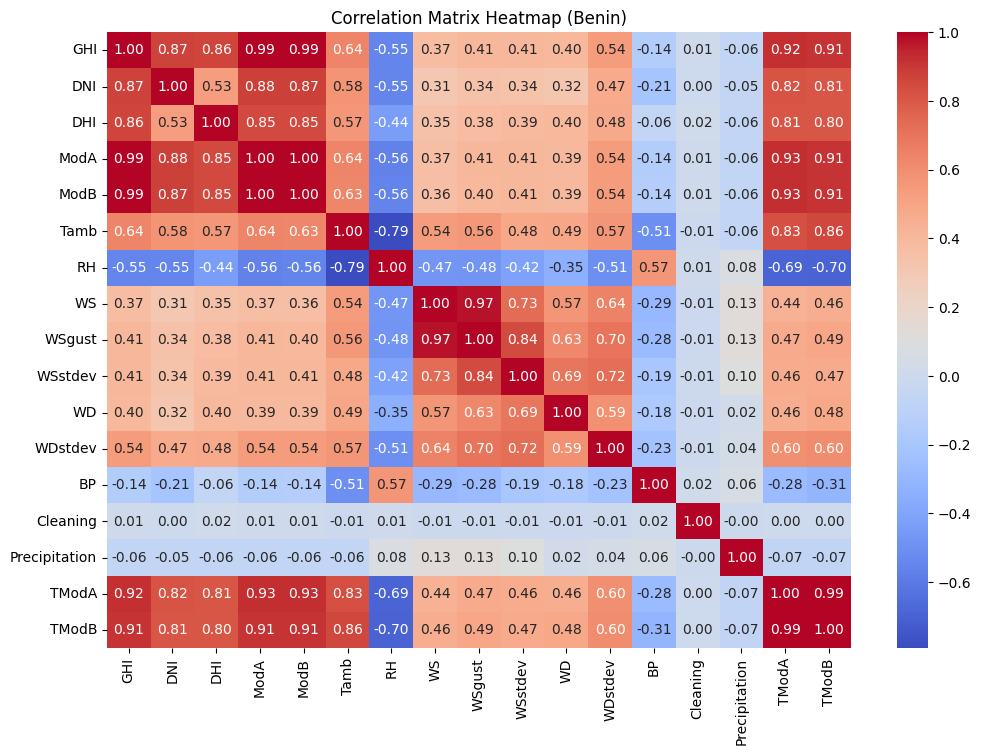

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data_sierraleone.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix Heatmap (Sierraleone)')
plt.show()


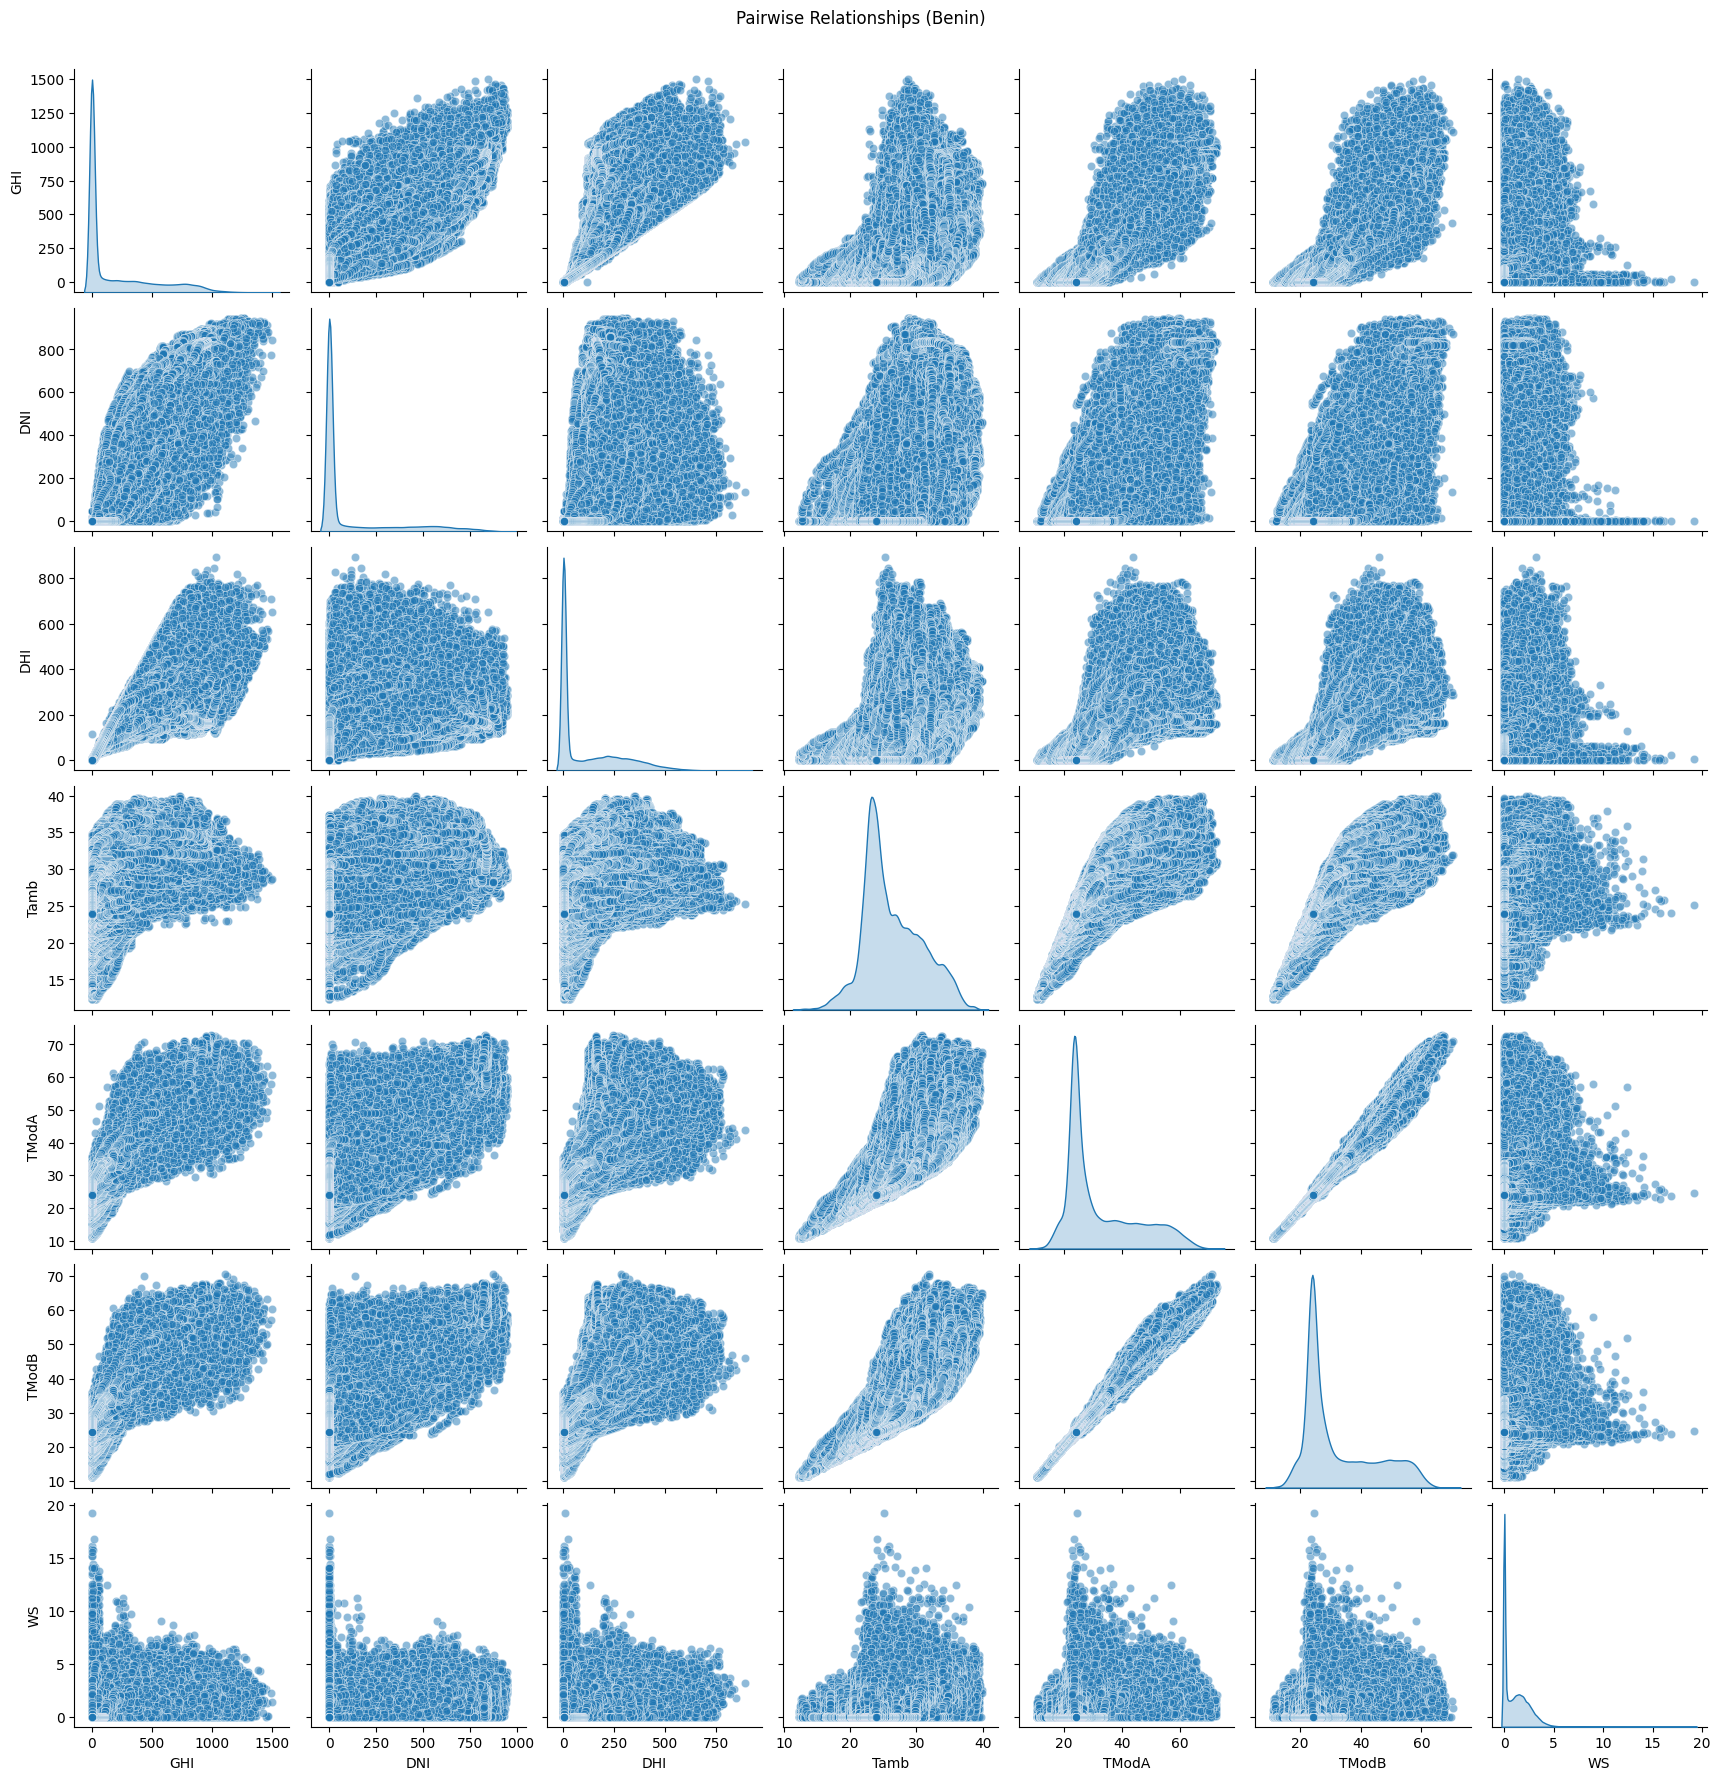

In [ ]:
# Select key variables for pairwise comparison
selected_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'WS']

# Create a pair plot
sns.pairplot(data_sierraleone[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships (Sierraleone)', y=1.02)
plt.show()


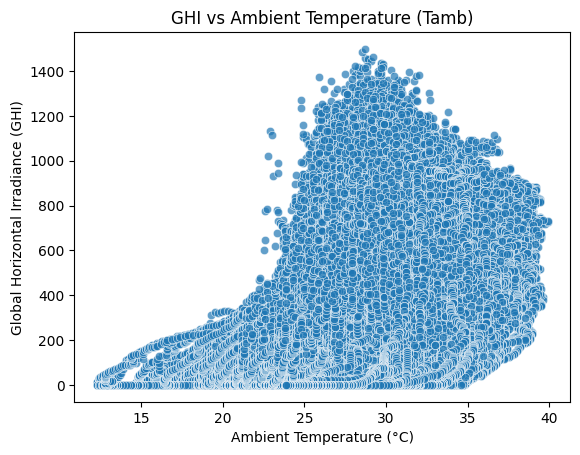

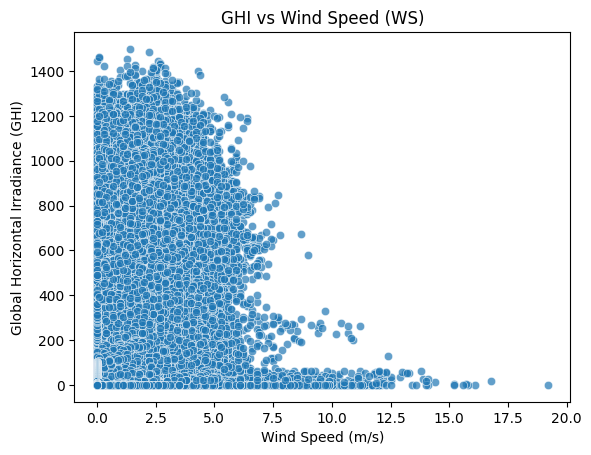

In [23]:
# Scatter plot: GHI vs Tamb
sns.scatterplot(x='Tamb', y='GHI', data=data_sierraleone, alpha=0.7)
plt.title('GHI vs Ambient Temperature (Tamb)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.show()

# Scatter plot: WS vs GHI
sns.scatterplot(x='WS', y='GHI', data=data_sierraleone, alpha=0.7)
plt.title('GHI vs Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.show()


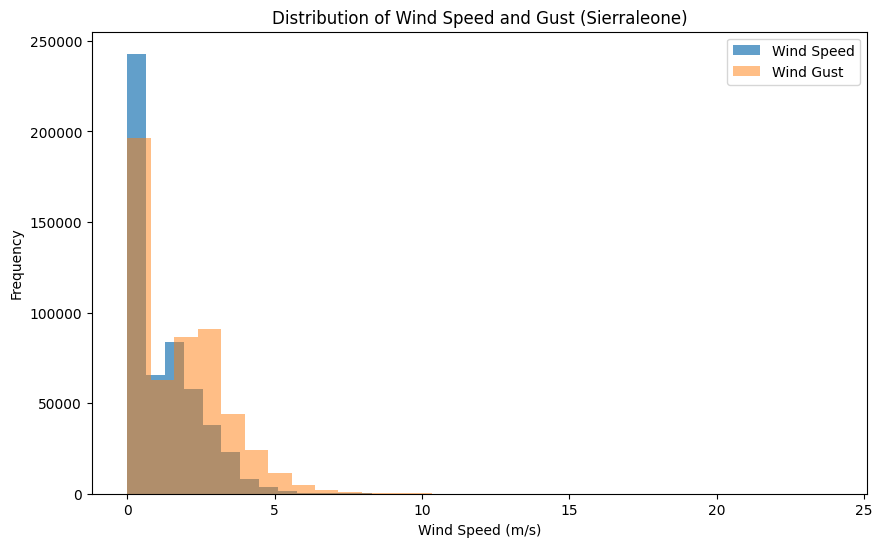

In [24]:
import matplotlib.pyplot as plt

# Plot histogram of wind speed
plt.figure(figsize=(10, 6))
plt.hist(data_sierraleone['WS'], bins=30, alpha=0.7, label='Wind Speed')
plt.hist(data_sierraleone['WSgust'], bins=30, alpha=0.5, label='Wind Gust')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed and Gust (Sierraleone)')
plt.legend()
plt.show()


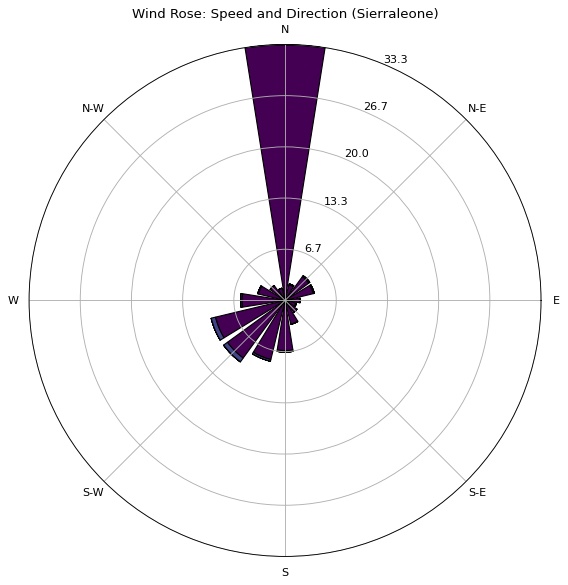

In [25]:
from windrose import WindroseAxes

# Wind rose plot for wind speed and direction
ax = WindroseAxes.from_ax()
ax.bar(data_sierraleone['WD'], data_sierraleone['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title('Wind Rose: Speed and Direction (Sierraleone)')
plt.show()


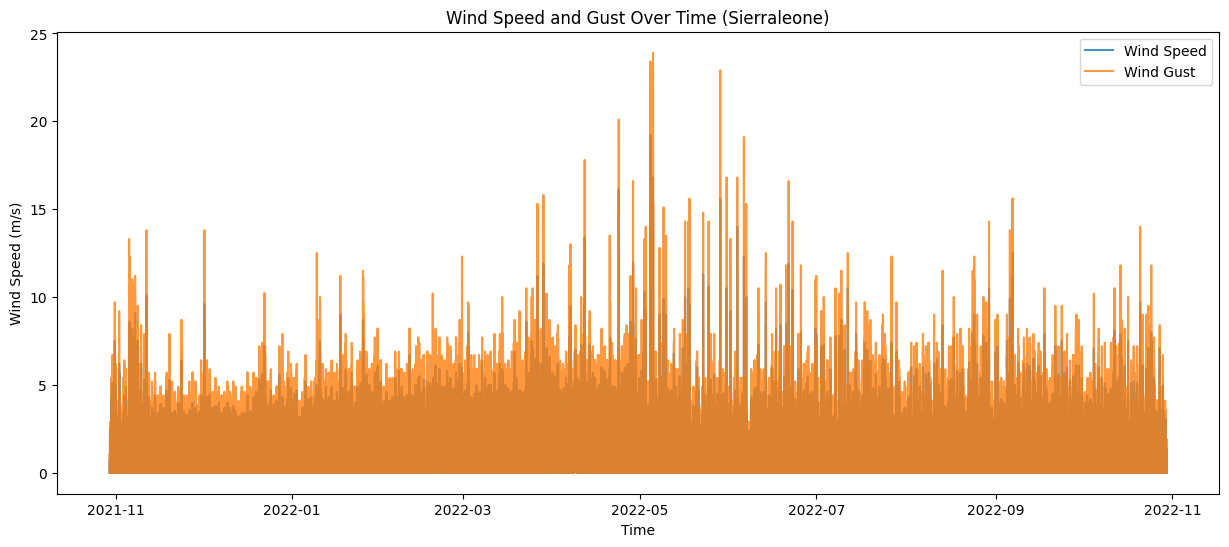

c:\Users\Admin\Desktop\TenX\Week-0\submit\KAIM3-Week-0\.myenvi\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


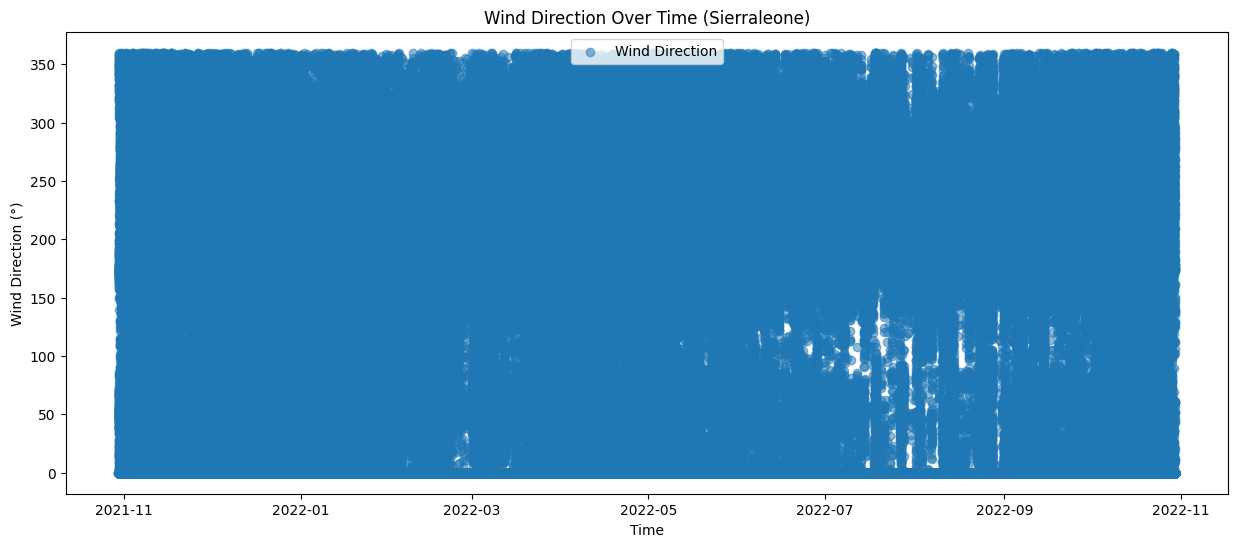

In [26]:
# Plot wind speed over time
plt.figure(figsize=(15, 6))
plt.plot(data_sierraleone.index, data_sierraleone['WS'], label='Wind Speed', alpha=0.8)
plt.plot(data_sierraleone.index, data_sierraleone['WSgust'], label='Wind Gust', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed and Gust Over Time (Sierraleone)')
plt.legend()
plt.show()

# Scatter plot: Wind direction over time
plt.figure(figsize=(15, 6))
plt.scatter(data_sierraleone.index, data_sierraleone['WD'], alpha=0.5, label='Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Direction (°)')
plt.title('Wind Direction Over Time (Sierraleone)')
plt.legend()
plt.show()


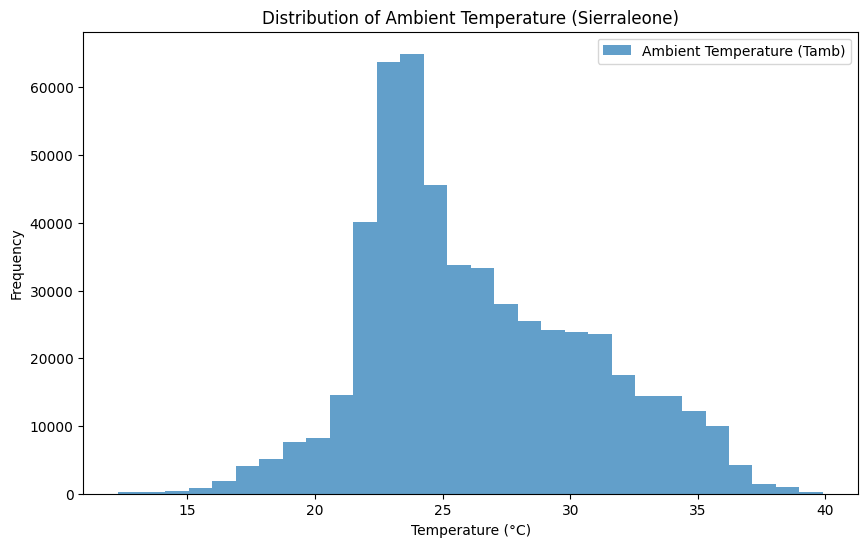

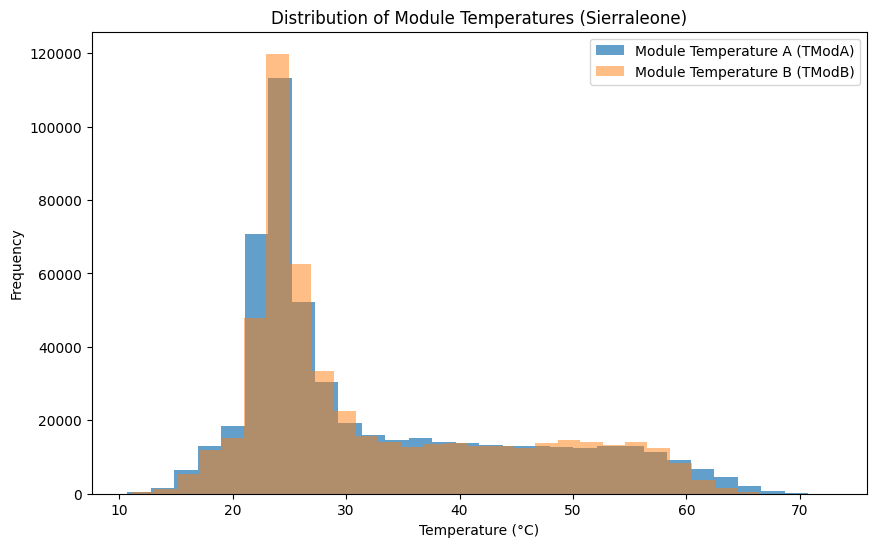

In [27]:
import matplotlib.pyplot as plt

# Plot histogram for ambient temperature (Tamb)
plt.figure(figsize=(10, 6))
plt.hist(data_sierraleone['Tamb'], bins=30, alpha=0.7, label='Ambient Temperature (Tamb)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Ambient Temperature (Sierraleone)')
plt.legend()
plt.show()

# Plot histogram for module temperatures (TModA, TModB)
plt.figure(figsize=(10, 6))
plt.hist(data_sierraleone['TModA'], bins=30, alpha=0.7, label='Module Temperature A (TModA)')
plt.hist(data_sierraleone['TModB'], bins=30, alpha=0.5, label='Module Temperature B (TModB)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Module Temperatures (Sierraleone)')
plt.legend()
plt.show()


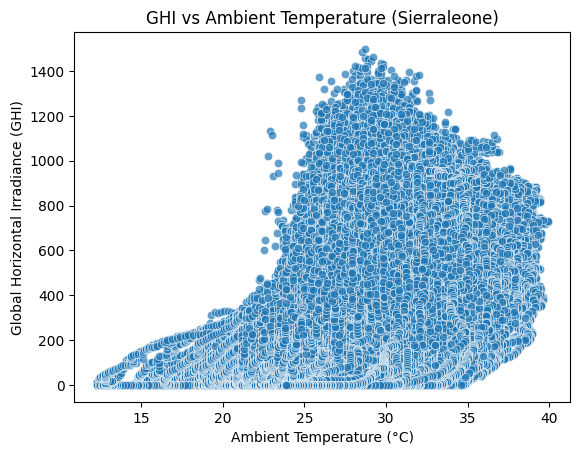

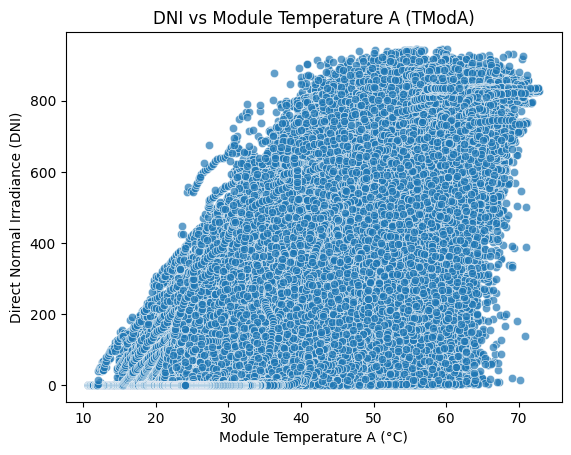

In [28]:
import seaborn as sns

# Scatter plot: GHI vs Ambient Temperature
sns.scatterplot(x='Tamb', y='GHI', data=data_sierraleone, alpha=0.7)
plt.title('GHI vs Ambient Temperature (Sierraleone)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.show()

# Scatter plot: Module Temperature A (TModA) vs DNI
sns.scatterplot(x='TModA', y='DNI', data=data_sierraleone, alpha=0.7)
plt.title('DNI vs Module Temperature A (TModA)')
plt.xlabel('Module Temperature A (°C)')
plt.ylabel('Direct Normal Irradiance (DNI)')
plt.show()


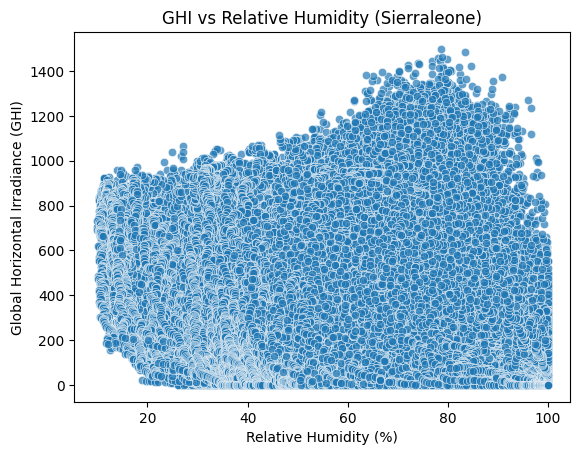

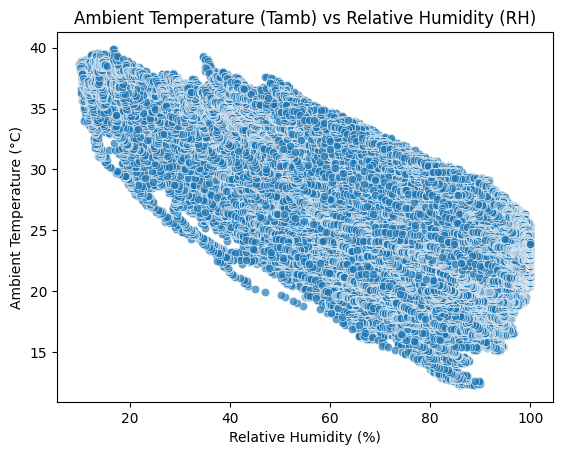

In [30]:
# Scatter plot: Relative Humidity (RH) vs GHI
sns.scatterplot(x='RH', y='GHI', data=data_sierraleone, alpha=0.7)
plt.title('GHI vs Relative Humidity (Sierraleone)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.show()

# Scatter plot: Relative Humidity (RH) vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=data_sierraleone, alpha=0.7)
plt.title('Ambient Temperature (Tamb) vs Relative Humidity (RH)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()


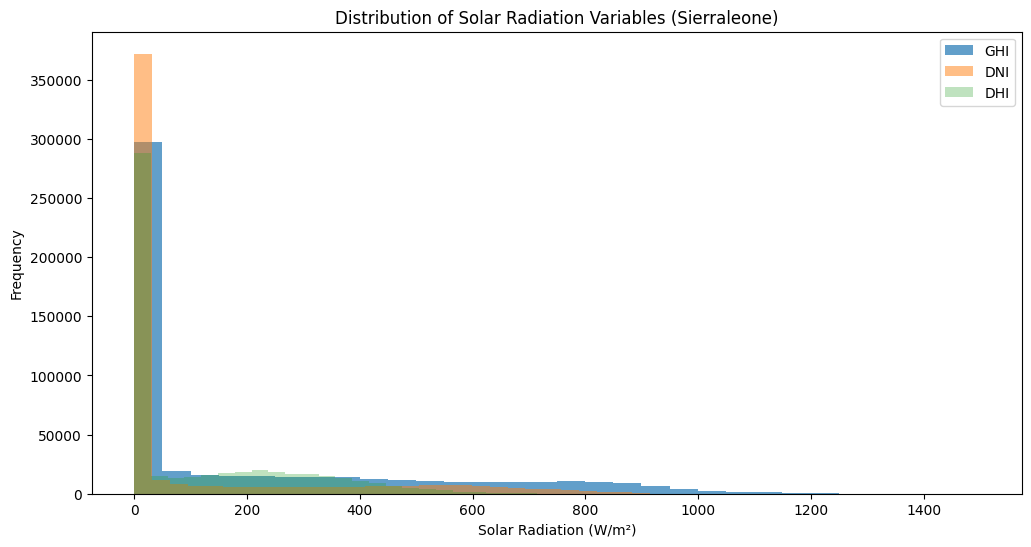

In [31]:
import matplotlib.pyplot as plt

# Plot histograms for solar radiation variables
plt.figure(figsize=(12, 6))
plt.hist(data_sierraleone['GHI'], bins=30, alpha=0.7, label='GHI')
plt.hist(data_sierraleone['DNI'], bins=30, alpha=0.5, label='DNI')
plt.hist(data_sierraleone['DHI'], bins=30, alpha=0.3, label='DHI')
plt.xlabel('Solar Radiation (W/m²)')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Radiation Variables (Sierraleone)')
plt.legend()
plt.show()


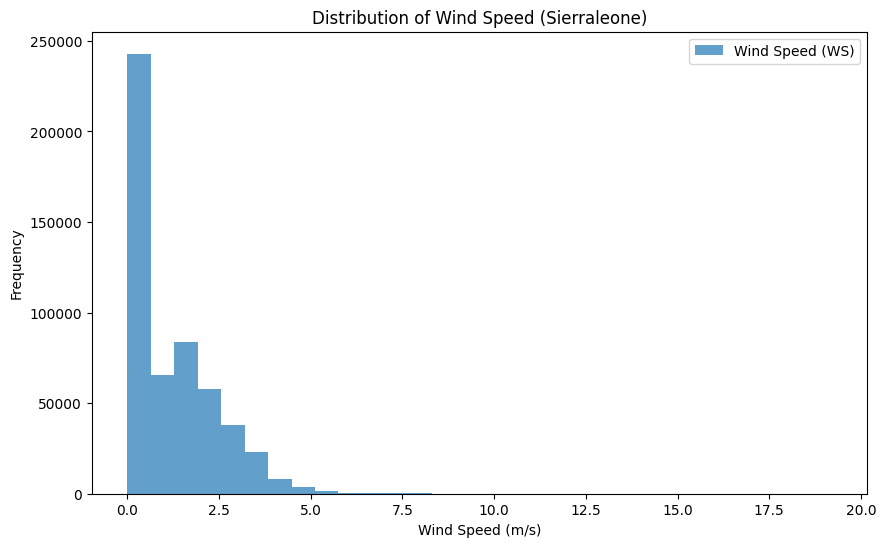

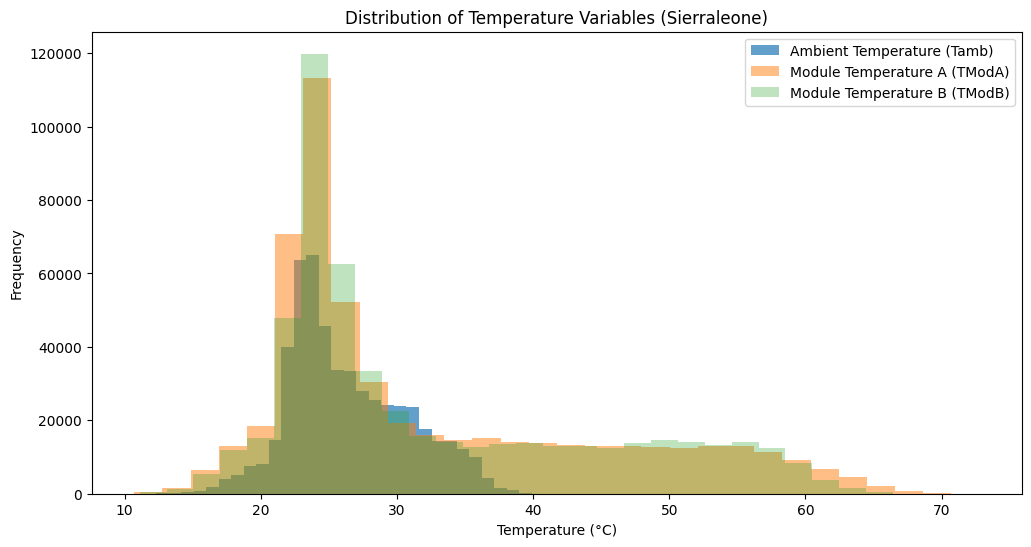

In [33]:
# Histogram for wind speed (WS)
plt.figure(figsize=(10, 6))
plt.hist(data_sierraleone['WS'], bins=30, alpha=0.7, label='Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed (Sierraleone)')
plt.legend()
plt.show()

# Histogram for temperature variables (Tamb, TModA, TModB)
plt.figure(figsize=(12, 6))
plt.hist(data_sierraleone['Tamb'], bins=30, alpha=0.7, label='Ambient Temperature (Tamb)')
plt.hist(data_sierraleone['TModA'], bins=30, alpha=0.5, label='Module Temperature A (TModA)')
plt.hist(data_sierraleone['TModB'], bins=30, alpha=0.3, label='Module Temperature B (TModB)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Variables (Sierraleone)')
plt.legend()
plt.show()


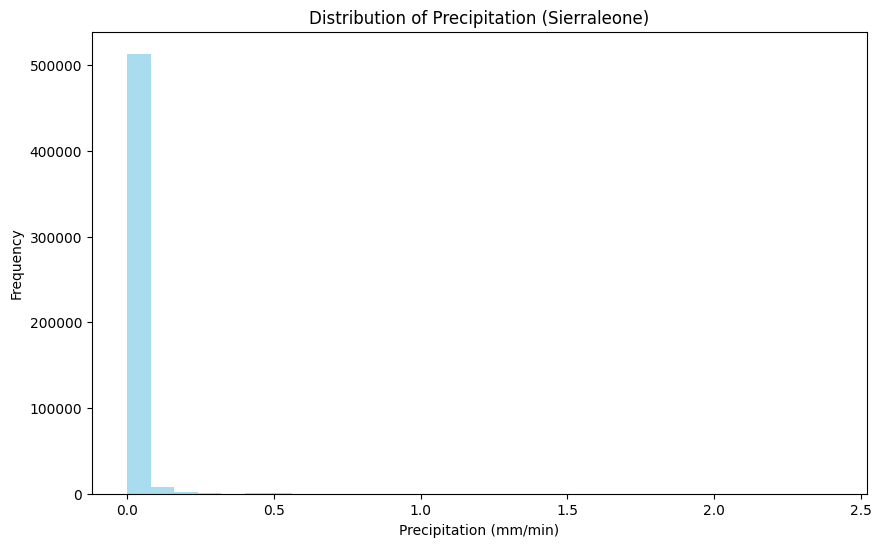

In [34]:
# Histogram for precipitation
plt.figure(figsize=(10, 6))
plt.hist(data_sierraleone['Precipitation'], bins=30, alpha=0.7, color='skyblue')
plt.xlabel('Precipitation (mm/min)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation (Sierraleone)')
plt.show()


In [35]:
from scipy.stats import zscore

# Select numerical columns to analyze
numerical_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'RH', 'WS', 'WSgust']

# Compute Z-scores for numerical columns
z_scores = data_sierraleone[numerical_columns].apply(zscore)

# Add Z-scores to the original dataset (optional)
for col in numerical_columns:
    data_sierraleone[f'{col}_zscore'] = z_scores[col]

# Display a sample of Z-scores
print("Z-Scores for Selected Columns (Sample):")
print(data_sierraleone[[f'{col}_zscore' for col in numerical_columns]].head())


Z-Scores for Selected Columns (Sample):
                     GHI_zscore    DNI_zscore  DHI_zscore  Tamb_zscore  \
Timestamp                                                                
2021-10-30 00:01:00         0.0  6.502540e-17         0.0    -1.004727   
2021-10-30 00:02:00         0.0  6.502540e-17         0.0    -1.004727   
2021-10-30 00:03:00         0.0  6.502540e-17         0.0    -1.004727   
2021-10-30 00:04:00         0.0 -5.334791e-01         0.0    -1.004727   
2021-10-30 00:05:00         0.0 -5.334791e-01         0.0    -1.004727   

                     TModA_zscore  TModB_zscore  RH_zscore  WS_zscore  \
Timestamp                                                               
2021-10-30 00:01:00     -0.820616     -0.832123   0.957623  -0.924846   
2021-10-30 00:02:00     -0.820616     -0.832123   0.962496  -0.924846   
2021-10-30 00:03:00     -0.820616     -0.832123   0.962496  -0.924846   
2021-10-30 00:04:00     -0.820616     -0.832123   0.967369  -0.924846   
202

In [36]:
# Threshold for outliers
threshold = 3

# Flag outliers in numerical columns
outliers = {}
for col in numerical_columns:
    outliers[col] = data_sierraleone[abs(data_sierraleone[f'{col}_zscore']) > threshold]
    print(f"\nOutliers in {col}:")
    print(outliers[col])



Outliers in GHI:
                        GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-10-30 11:04:00  1119.0  673.5  538.4  1193.0  1167.0  26.3  83.1  0.1   
2021-10-30 11:12:00  1154.0  755.7  491.3  1237.0  1208.0  27.0  82.4  1.2   
2021-10-30 13:01:00  1111.0  812.0  361.4  1189.0  1162.0  29.5  73.0  0.7   
2021-10-30 13:02:00  1126.0  815.0  373.3  1202.0  1175.0  29.7  72.4  0.6   
2021-10-30 13:03:00  1151.0  813.0  400.1  1226.0  1198.0  30.0  72.2  2.1   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-10-24 13:08:00  1134.0  674.6  497.0  1169.0  1143.0  29.9  73.8  2.5   
2022-10-24 13:09:00  1162.0  715.4  487.6  1198.0  1171.0  29.9  75.8  2.8   
2022-10-24 13:10:00  1163.0  730.8  475.6  1199.0  1173.0  29.9  75.0  2.5   
2022-10-24 13:11:00  1125.0  698.6  467.5  1159.0  1133.0  30.1  76.5  2.9   
2022-10-24 14:24:00  1109.0  762.0  470.3  113

In [37]:
for col in numerical_columns:
    data_sierraleone= data_sierraleone[abs(data_sierraleone[f'{col}_zscore']) <= threshold]


In [38]:
for col in numerical_columns:
    data_sierraleone.loc[abs(data_sierraleone[f'{col}_zscore']) > threshold, col] = data_sierraleone[col].mean()


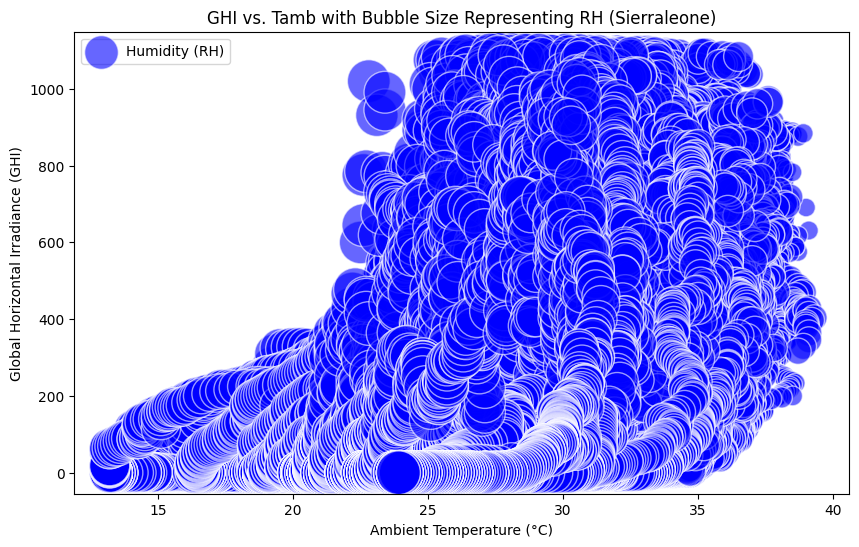

In [39]:
import matplotlib.pyplot as plt

# Bubble chart: GHI vs. Tamb with bubble size representing RH
plt.figure(figsize=(10, 6))
plt.scatter(data_sierraleone['Tamb'], data_sierraleone['GHI'], 
            s=data_sierraleone['RH'] * 10,  # Bubble size proportional to RH
            alpha=0.6, c='blue', edgecolor='w', label='Humidity (RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('GHI vs. Tamb with Bubble Size Representing RH (Sierraleone)')
plt.legend()
plt.show()


c:\Users\Admin\Desktop\TenX\Week-0\submit\KAIM3-Week-0\.myenvi\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


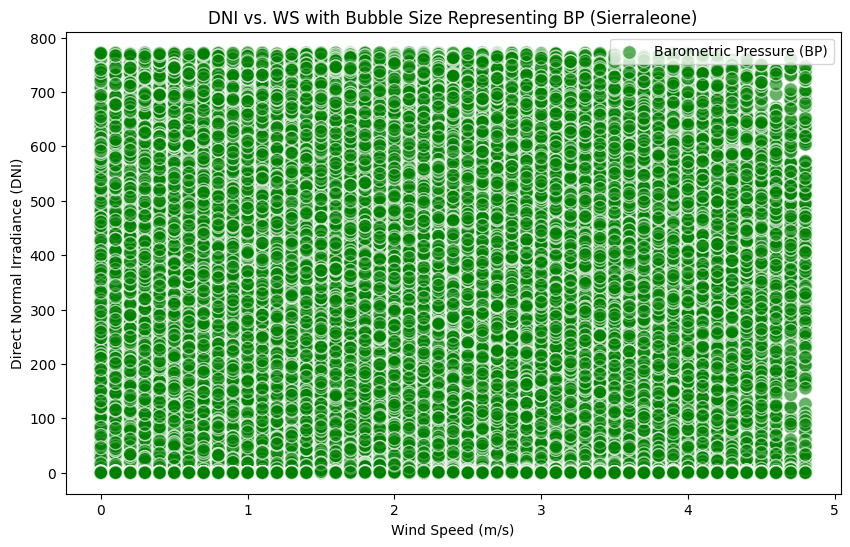

In [40]:
# Bubble chart: DNI vs. WS with bubble size representing BP
plt.figure(figsize=(10, 6))
plt.scatter(data_sierraleone['WS'], data_sierraleone['DNI'], 
            s=data_sierraleone['BP'] / 10,  # Bubble size proportional to BP
            alpha=0.6, c='green', edgecolor='w', label='Barometric Pressure (BP)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Direct Normal Irradiance (DNI)')
plt.title('DNI vs. WS with Bubble Size Representing BP (Sierraleone)')
plt.legend()
plt.show()


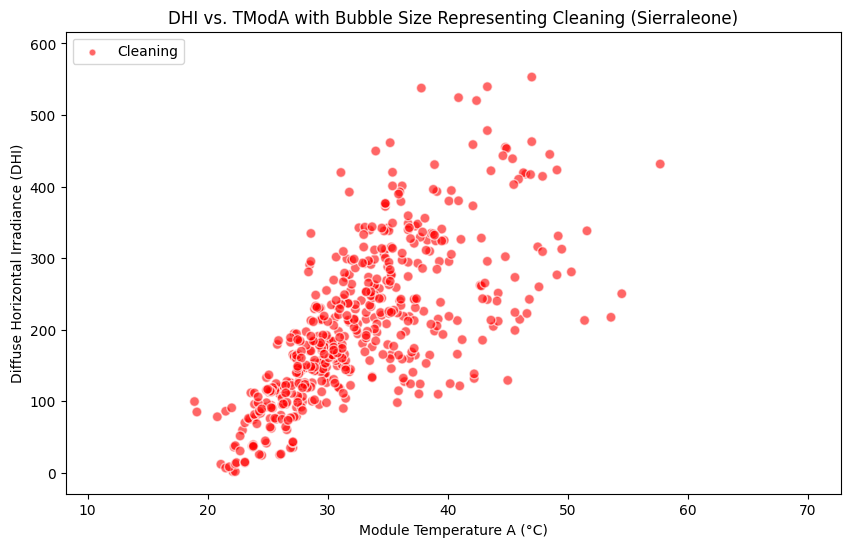

In [41]:
# Example: DHI vs TModA with bubble size representing Cleaning
plt.figure(figsize=(10, 6))
plt.scatter(data_sierraleone['TModA'], data_sierraleone['DHI'], 
            s=data_sierraleone['Cleaning'] * 50,  # Bubble size proportional to Cleaning
            alpha=0.6, c='red', edgecolor='w', label='Cleaning')
plt.xlabel('Module Temperature A (°C)')
plt.ylabel('Diffuse Horizontal Irradiance (DHI)')
plt.title('DHI vs. TModA with Bubble Size Representing Cleaning (Sierraleone)')
plt.legend()
plt.show()
